In [29]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import datasets, neighbors, linear_model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import MySQLdb
import json
import itertools
import os
import seaborn as sns
%matplotlib inline

In [2]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list
    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''
    
    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)

    return tprs, fprs, thresholds.tolist()

In [3]:
# Get MySQLdb password
passwd_path = '/Users/deck/_galvanize/_project/sportradar/api_keys/mysql.json'
with open(passwd_path) as f:
    data = json.load(f)
    passwd = data['access-key']
    
    
# Establish connection to MySQL database
conn = MySQLdb.connect(host="localhost",
                       user="root",
                       passwd=passwd,
                       db="hockey")
cur = conn.cursor()

In [10]:
# Create dataframe from feature matrix 
def load_train_test_data():
    sql = 'SELECT * FROM temp;'
    df = pd.read_sql(sql, conn)
    y = df.pop('win').values
    X = df.values
    return X_train, X_test, y_train, y_test = train_test_split(X, y)

In [27]:
# Code to fit the models and return accuracy scores
def fit_models(X_train, X_test, y_train, y_test):

    knn = neighbors.KNeighborsClassifier()
    logistic = linear_model.LogisticRegression()
    gb = GradientBoostingClassifier()
    rf = RandomForestClassifier()
    svm = SVC(kernel='linear')
    
    models = [knn, logistic, gb, rf, svm]
    n = '\n'
    
    for model in models:
        score = model.fit(X_train, y_train).score(X_test, y_test)
        print "{model} score:".format(model=model), score


In [28]:
fit_models(X_train, X_test, y_train, y_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') score: 0.63961038961
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) score: 0.840909090909
GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False) score: 0.827922077922
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=N

In [24]:
rf = RandomForestClassifier()

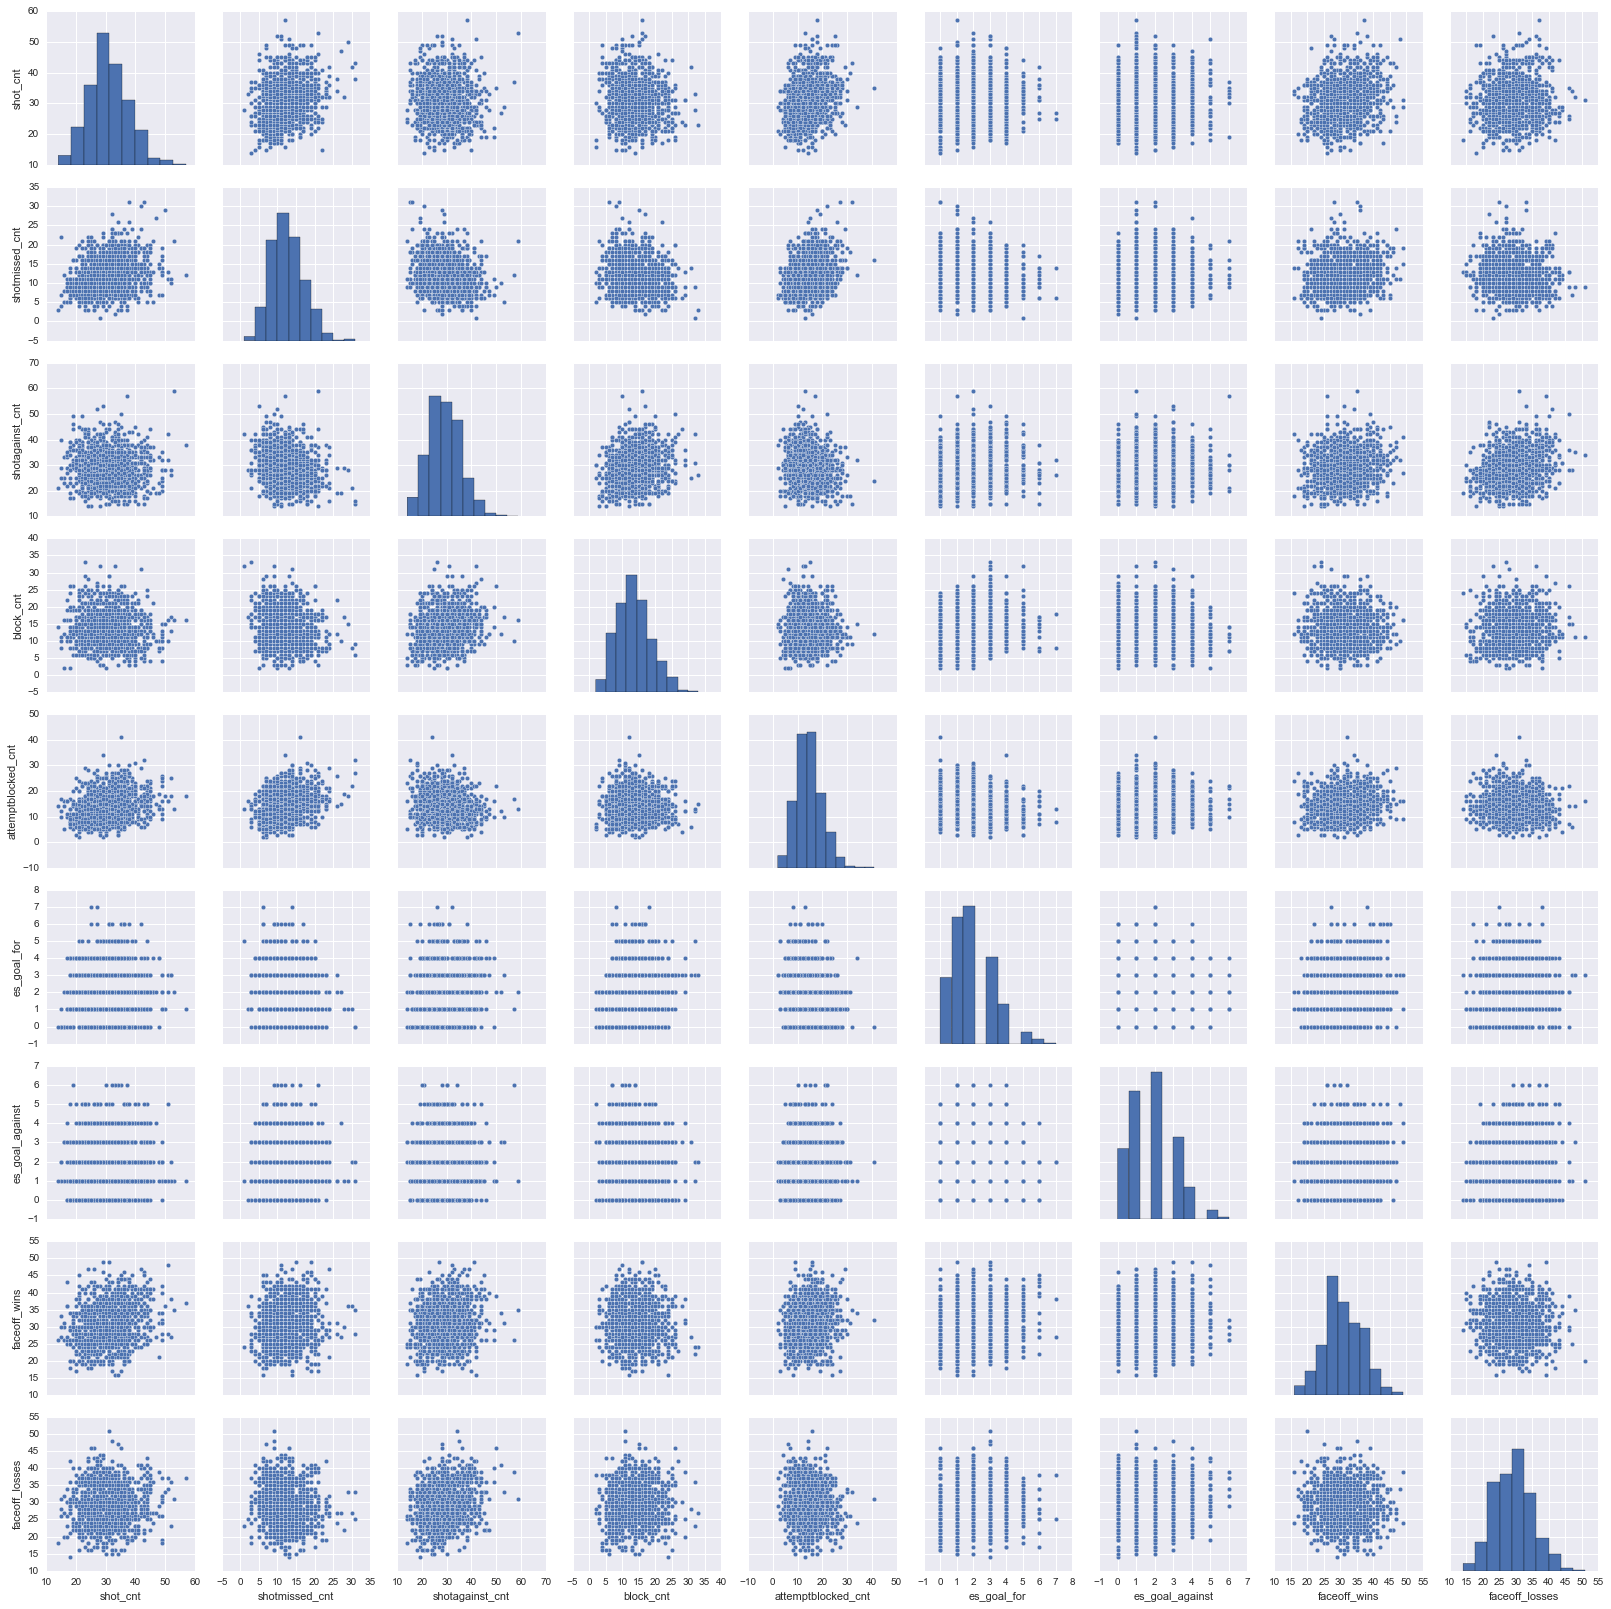

In [31]:
sns.pairplot(df)

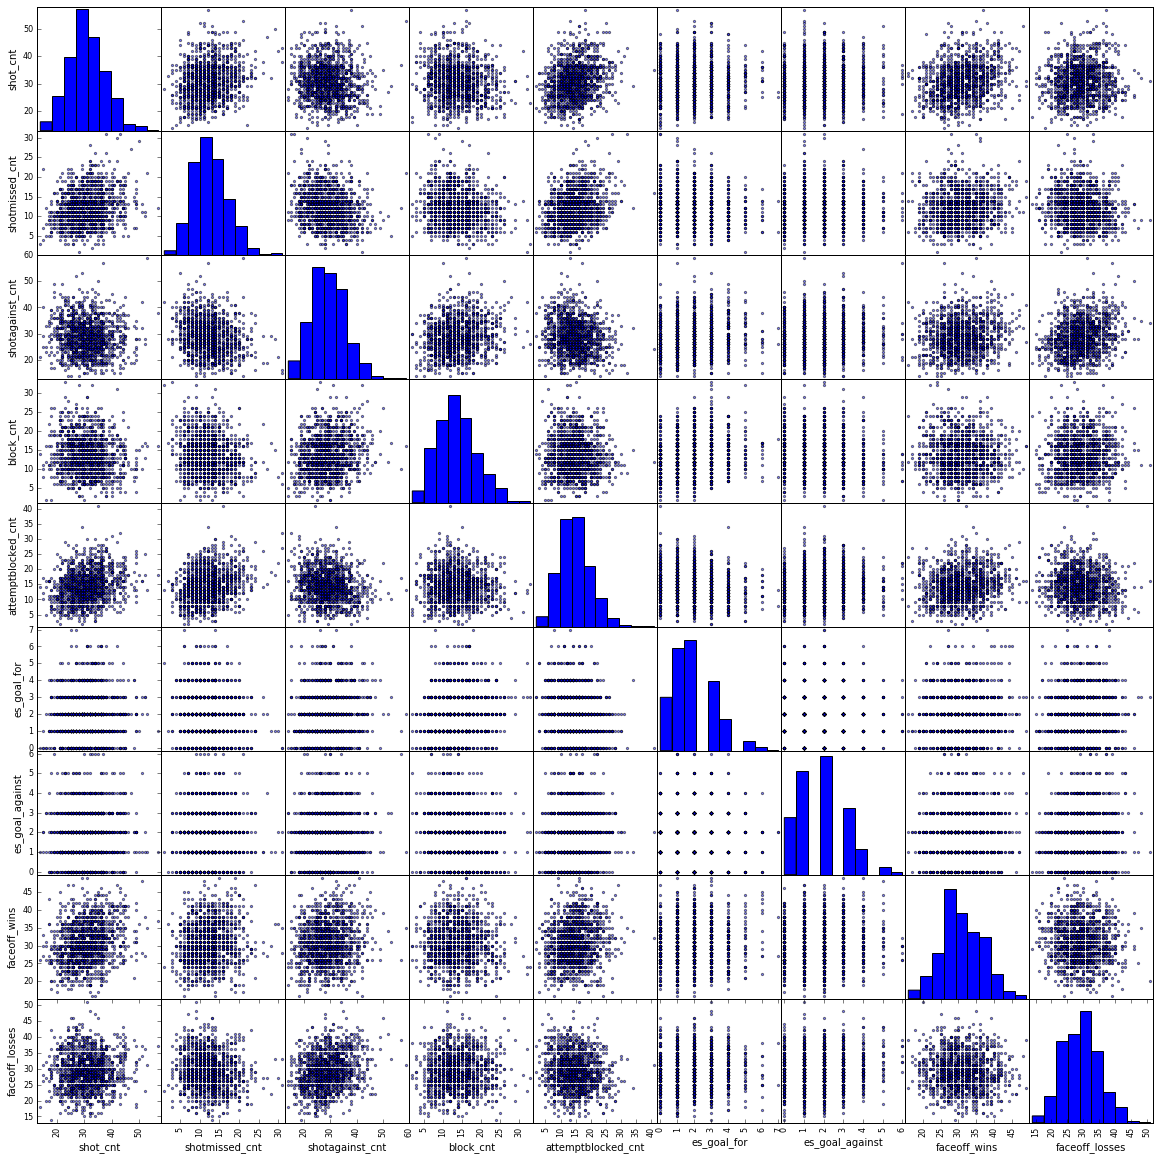

In [64]:
pd.scatter_matrix(df, figsize=(20,20))
plt.show()